In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.utils.np_utils import to_categorical

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
  rotation_range=10,
  zoom_range=0.1,
  width_shift_range=0.1,
  height_shift_range=0.1
)

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv


Using TensorFlow backend.


In [2]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")
ssub = pd.read_csv("../input/digit-recognizer/sample_submission.csv")

In [3]:
train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
ssub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [5]:
y = train.label
X = train.drop('label', axis=1)

In [6]:
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [7]:
X = X/255.0
test = test/255.0

In [8]:
X = X.to_numpy().reshape(-1, 28,28,1)
test = test.to_numpy().reshape(-1, 28,28,1)

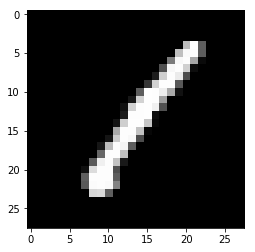

In [9]:
plt.imshow(X[0][:,:,0], cmap='gray');

Epoch 1/1
630/630 [==============================] - 13s 21ms/step - loss: 0.5581 - accuracy: 0.8176
1 **********
[[ 984    0    2    3    0    9    1    0   33    1]
 [   0 1126   11    6    1    0    1   12   12    2]
 [   0    0 1019   17    0    0    1    2    6    0]
 [   0    0    4 1074    0    2    0    2    5    1]
 [   0    0    2    1  978    0    4    0    4   29]
 [   1    0    0   16    0  926    0    0    6    0]
 [   3    1    0    0    0    2 1020    0    9    0]
 [   0    0   11   33    0    0    0 1045    4    8]
 [   0    1    3    3    0    1    0    2 1003    3]
 [   3    0    1    4    3   15    0    8   12 1001]]
Epoch 1/1
630/630 [==============================] - 12s 19ms/step - loss: 0.5671 - accuracy: 0.8143
2 **********
[[1022    0    0    0    0    1    4    0    6    0]
 [   0 1153    7    3    0    0    0    2    6    0]
 [   1    2 1015    6    0    0    1   10    9    0]
 [   0    0    5 1070    0    9    0    0    1    3]
 [   1    0    2    0  991   

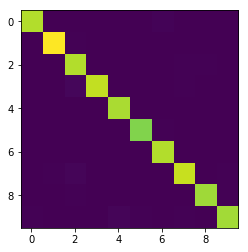

In [10]:
kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=2)
i = 1
for sub_train, sub_test in kfold.split(X, y):
    yy = to_categorical(y.copy(), num_classes = 10)
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X.shape[1:]))
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
    )
    
    model.fit_generator(datagen.flow(X[sub_train], yy[sub_train], batch_size=50), epochs=1, verbose=1)
    
    y_pred = model.predict(X[sub_test])
    
    Y_pred_classes = np.argmax(y_pred,axis = 1) 
    # Convert validation observations to one hot vectors
    Y_true = np.argmax(yy[sub_test],axis = 1) 
    # compute the confusion matrix
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
#     cm = confusion_matrix(yy[test], y_pred)

    print(i,'*'*10)
    print(confusion_mtx)
    plt.imshow(confusion_mtx, interpolation='nearest')
    i += 1
    


4-fold accuracy: 
Epoch 1/1
630/630 [==============================] - 11s 17ms/step - loss: 0.5285 - accuracy: 0.8277
1 **********
Epoch 1/1
630/630 [==============================] - 11s 17ms/step - loss: 0.5680 - accuracy: 0.8135
2 **********
Epoch 1/1
630/630 [==============================] - 11s 17ms/step - loss: 0.5427 - accuracy: 0.8235
3 **********
Epoch 1/1
631/631 [==============================] - 11s 17ms/step - loss: 0.5442 - accuracy: 0.8218
4 **********

In [11]:
yy = to_categorical(y.copy(), num_classes = 10)
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

model.fit_generator(datagen.flow(X, yy, batch_size=100), epochs=5, verbose=1)

y_pred = model.predict(test)

y_submission = np.argmax(y_pred,axis = 1)

Epoch 1/5
420/420 [==============================] - 13s 31ms/step - loss: 0.5646 - accuracy: 0.8164
Epoch 2/5
420/420 [==============================] - 13s 31ms/step - loss: 0.1674 - accuracy: 0.9505
Epoch 3/5
420/420 [==============================] - 13s 31ms/step - loss: 0.1221 - accuracy: 0.9645
Epoch 4/5
420/420 [==============================] - 13s 31ms/step - loss: 0.0992 - accuracy: 0.9706
Epoch 5/5
420/420 [==============================] - 13s 31ms/step - loss: 0.0887 - accuracy: 0.9734


In [12]:
submission = pd.DataFrame({'ImageId': range(1,28001), 'Label':y_submission})
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [13]:
submission.to_csv('cnn_submission_01.csv',index=False)